In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/mnt/c/Users/Tal/OneDrive - The Ohio State University/Beartooth2021/Data/' # path to folder with isotope data
df = pd.read_csv(path + 'Shutkin_Beartooth2021_WaterSamples.csv') # read file as pandas dataframe
#GBEX/GBEX21_water_isotopes.csv')
df

,Site ID,Name,Date-Time,Lat,Lon,LakeID,Alt,Temp,pH,Dopercent,DOmg/L,Cond,S. Cond,pp.,d18O,dD
0,LL21_in,Lost Lake In,27/08/2021,NaN,NaN,1,2620,12.35,6.86,88.2,9.51,41.0,54.0,11,-15.77,-121.74
1,LL21_out,Lost Lake Out,27/08/2021 16:32,NaN,NaN,1,2620,10.71,7.01,76.0,8.21,36.0,50.0,11,-15.53,-123.51
2,KB_Mixed_Prcp,Precipitaiton,28/08/2021 7:15,NaN,NaN,2,2667,NaN,NaN,NaN,NaN,NaN,NaN,12,-16.10,-118.72
3,SM21_in,September Morn 21 In,28/08/2021 11:51,NaN,NaN,3,2966,6.08,6.10,82.0,9.92,24.0,37.0,12,-16.50,-124.66
4,SM21_out,September Morn 21 Out,27/08/2021 14:47,NaN,NaN,3,2942,10.07,7.46,82.3,9.25,17.0,23.0,12,-17.49,-132.70
5,KB21_out,Keyser Brown 21 Out,28/08/2021 19:00,NaN,NaN,2,2655,10.32,6.85,86.0,9.63,21.0,29.0,13,-17.70,-133.43
6,KB21_LS,Keyser Brown Lower Spring,28/08/2021,NaN,NaN,2,2655,6.73,5.80,79.5,9.71,12.0,19.0,13,-18.43,-140.08
7,KB21_US,Keyser Brown Upper Spring,28/08/2021 19:10,NaN,NaN,2,2655,6.57,6.47,80.6,9.86,16.0,25.0,14,-16.91,-128.67
8,KB21_in,Keyser Brown In,29/08/2021 9:32,NaN,NaN,2,2655,8.23,6.64,82.0,9.65,22.0,33.0,14,-17.29,-129.73
9,SR21_in,Second Rock In,29/08/2021 14:20,NaN,NaN,4,2776,8.52,6.18,83.0,9.71,21.0,31.0,14,-17.03,-127.17


In [3]:
# Create Global Meteoric Water Line (GMWL or MWL) model
Xs = np.arange(round(df['d18O'].min()-1), round(df['d18O'].max()+2), 1) # set range based on data
Ys = np.array([8.02*X + 9.47 for X in Xs]) # calcuate GMWL

In [4]:
Xs,Ys

(array([-19, -18, -17, -16, -15]),
 array([-142.91, -134.89, -126.87, -118.85, -110.83]))

In [ ]:
# size= (df.Alt)**2/100000 # attempt to symbolize points based on altitutde, wouldn't re`1comend

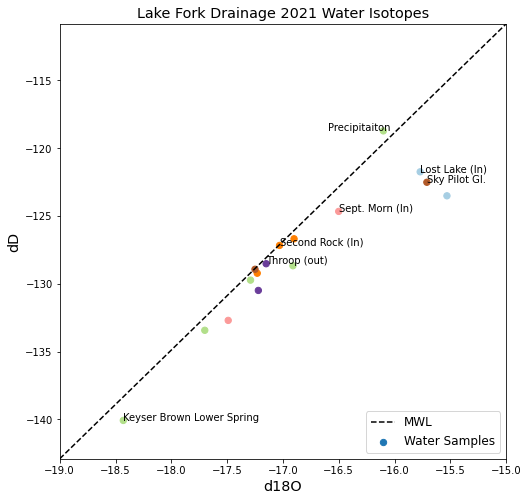

In [12]:
f,ax =plt.subplots(figsize=(8,8))

#ax.errorbar(df['d18O'],df['dD'],xerr=0.11, yerr=1.15, fmt='none',ecolor='k');

# Plotting 
data=ax.scatter(df['d18O'],df['dD'],label='Water Samples', 
                c=df.LakeID, cmap='Paired', s=40); # c=df.LakeID means that points are colored based on the closest lake to where they were taken. Using the color scheme called "Paired"

ax.plot(Xs,Ys,'--',color='k',label='MWL');
ax.set_xlabel('d18O',fontsize='x-large');
ax.set_ylabel('dD',fontsize='x-large');
ax.set_xlim(min(Xs),max(Xs));
ax.set_ylim(min(Ys),max(Ys));
ax.legend(fontsize='large',loc='lower right');
ax.set_title('Lake Fork Drainage 2021 Water Isotopes',fontsize='x-large');

# If you want to add a colorbar based on a column in df
# Would take some fooling to make this look good...
#f.colorbar(data, label='Lake ID');

# set text

#  to label each point: a bit sloppy

# annotations = df['Site ID'].values
# for a in annotations:
#     p = df.loc[df['Site ID']==a]
#     ax.annotate(a,(p['d18O'],p['dD']));


# To label select points:

#Select points of interest
index_1=df.loc[df['dD']==max(df['dD'])].index.values[0]
index_2=df.loc[df['Site ID']=='SPG'].index.values[0]
index_3=df.loc[df['dD']==min(df['dD'])].index.values[0]
index_4=df.loc[df['Site ID']=='LL21_out'].index.values[0]
index_5=df.loc[df['Site ID']=='LL21_in'].index.values[0]
index_6=df.loc[df['Site ID']=='SM21_in'].index.values[0]
#index_7=df.loc[df['Site ID']=='SM21_out'].index.values[0]
index_8=df.loc[df['Site ID']=='TL21_North_in'].index.values[0]
index_9=df.loc[df['Site ID']=='SR21_in'].index.values[0]

#"""
#Annotate
ax.annotate(df.loc[index_1].Name,(df.loc[index_1]['d18O']-0.5,df.loc[index_1]['dD']));
ax.annotate('Sky Pilot Gl.',(df.loc[index_2]['d18O'],df.loc[index_2]['dD']));
ax.annotate('Keyser Brown Lower Spring',(df.loc[index_3]['d18O'],df.loc[index_3]['dD']));
#ax.annotate('Lost Lake Out ',(df.loc[index_4]['d18O']-0.25,df.loc[index_4]['dD']-1));
ax.annotate('Lost Lake (In)',(df.loc[index_5]['d18O'],df.loc[index_5]['dD']));
ax.annotate('Sept. Morn (In)',(df.loc[index_6]['d18O'],df.loc[index_6]['dD']));
#ax.annotate('SM_out',(df.loc[index_7]['d18O'],df.loc[index_7]['dD']));
ax.annotate('Throop (out)',(df.loc[index_8]['d18O'],df.loc[index_8]['dD']));
ax.annotate('Second Rock (In)',(df.loc[index_9]['d18O'],df.loc[index_9]['dD']));
#""";


In [68]:
f.savefig(path + 'LakeFork_water_isotopes.png') # save to folder with data

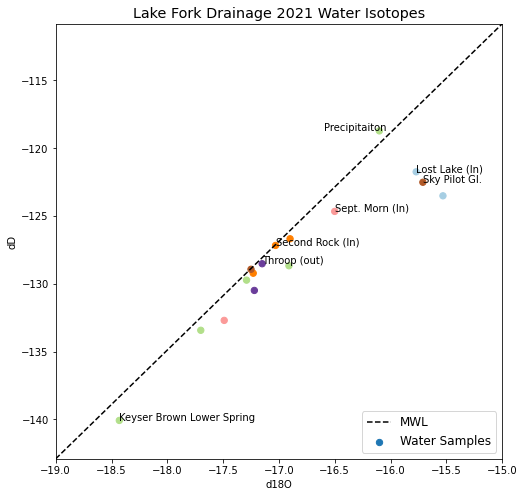

In [67]:
f